# Add 50% of null, duplicate and outliers at dataset

In [1]:
import os
import sys

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import ML_algorithms
import sanity_checks_methods
import pandas as pd

duplicates_directory = os.path.join(project_directory, 'duplicates')
if duplicates_directory not in sys.path:
    sys.path.append(duplicates_directory)

import duplicates_utils

duplicates_directory = os.path.join(project_directory, 'null_dataset')
if duplicates_directory not in sys.path:
    sys.path.append(duplicates_directory)

import null_utility

duplicates_directory = os.path.join(project_directory, 'outliers')
if duplicates_directory not in sys.path:
    sys.path.append(duplicates_directory)

import outliers_utils

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_clean = df.copy()

## Dirty the most important feature

In [2]:
df = duplicates_utils.replace_duplicates_values(df, 50)
indices, original_values = null_utility.add_null_values(df,'avg_glucose_level', 50)
df = outliers_utils.outliers_replace(df, 'avg_glucose_level', 50)


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      1434
           1       0.70      0.85      0.77      1375

    accuracy                           0.75      2809
   macro avg       0.76      0.75      0.74      2809
weighted avg       0.76      0.75      0.74      2809

Node Labels:
 Annotation(0.558728, 0.954545, 'hypertension <= 0.5\nsamples = 6554\nvalue = [3246.0, 3308.0]\nclass = 1')


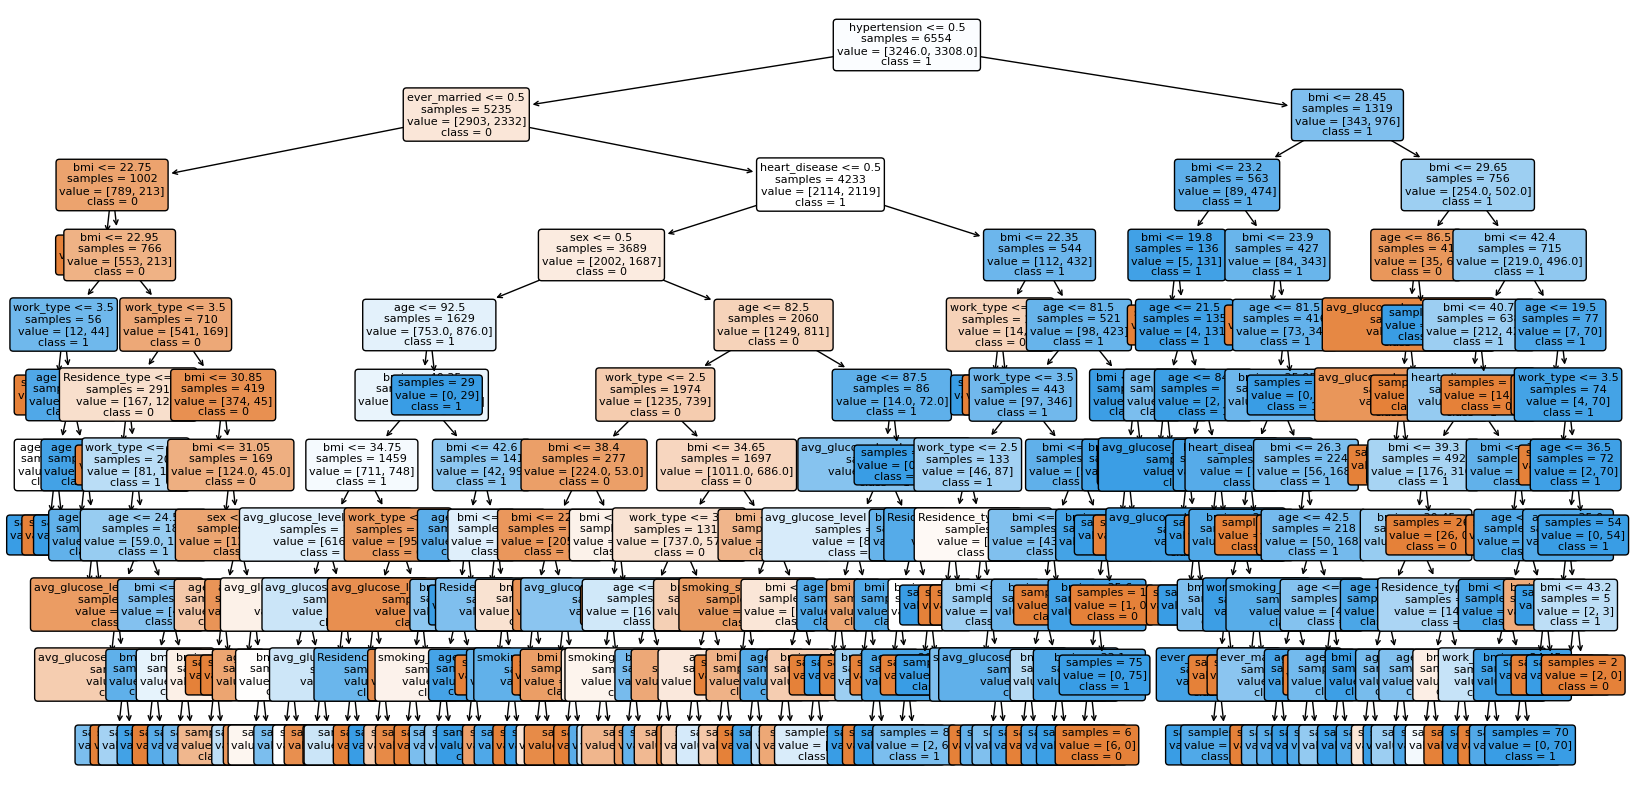

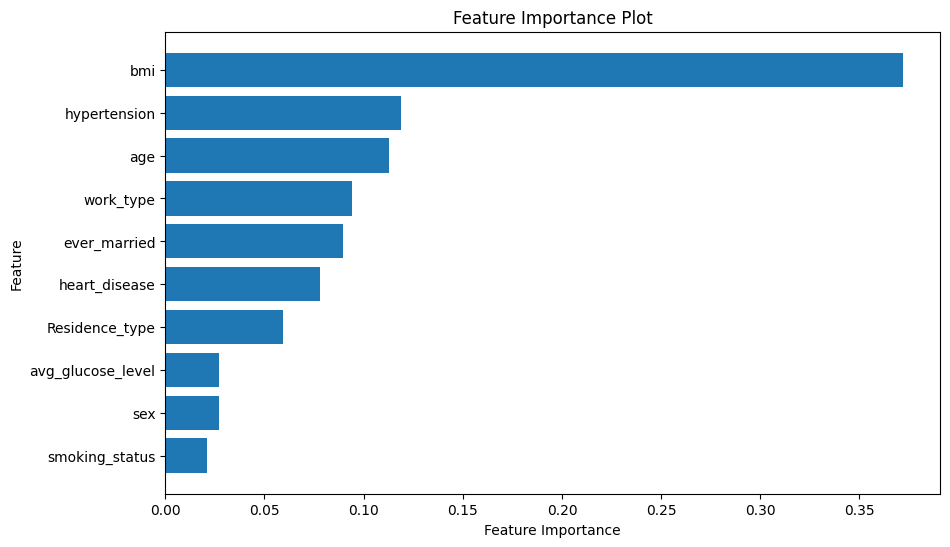

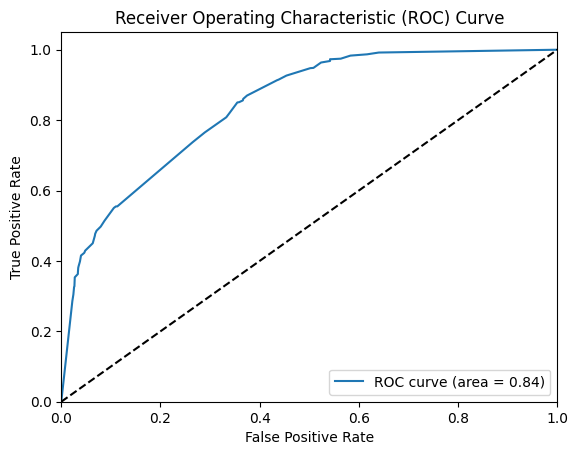

AUC Score: 0.8406189932800812


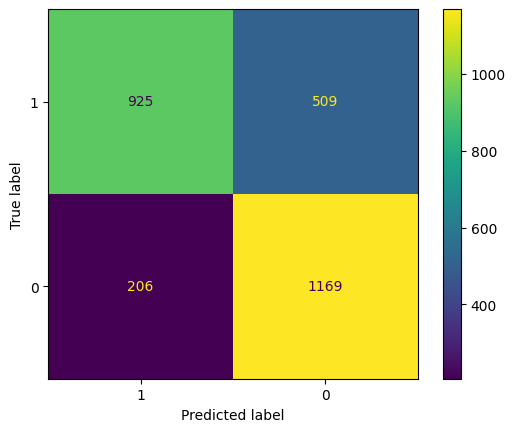

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7935943060498221, 0.8362989323843416, 0.8078291814946619, 0.8078291814946619, 0.8505338078291815, 0.797153024911032, 0.8434163701067615, 0.8220640569395018, 0.7758007117437722, 0.8535714285714285]
Mean accuracy: 0.8188091001525164
95% confidence interval: (0.799833789598073, 0.8377844107069597)


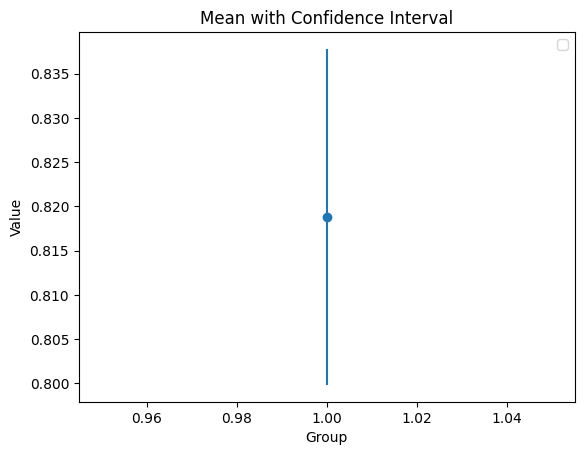


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1434
           1       0.75      0.74      0.74      1375

    accuracy                           0.75      2809
   macro avg       0.75      0.75      0.75      2809
weighted avg       0.75      0.75      0.75      2809



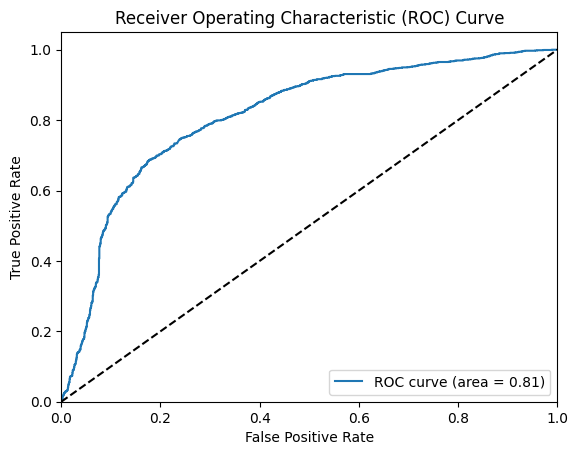

AUC Score: 0.8124082667680994


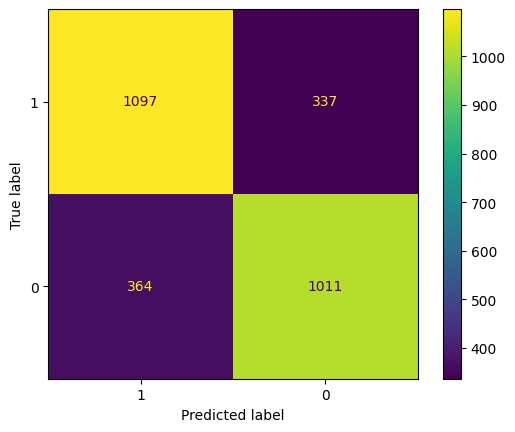

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7544483985765125, 0.7580071174377224, 0.7651245551601423, 0.7864768683274022, 0.7615658362989324, 0.797153024911032, 0.8185053380782918, 0.7900355871886121, 0.7864768683274022, 0.8071428571428572]
Mean accuracy: 0.7824936451448907
95% confidence interval: (0.7667960917933797, 0.7981911984964017)


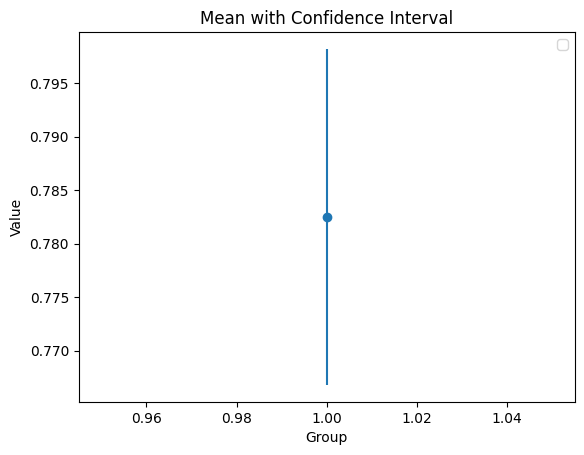

In [3]:
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_dt, y_test_dt, classification_report_dt, decision_tree = ML_algorithms.model_dt(df, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_clean)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_svm, y_test_svm, classification_report_svm, svm = ML_algorithms.model_svm(df, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm,df_clean) 
    
df.loc[indices, 'avg_glucose_level'] = original_values

## Conclusion

### ROC Curve 

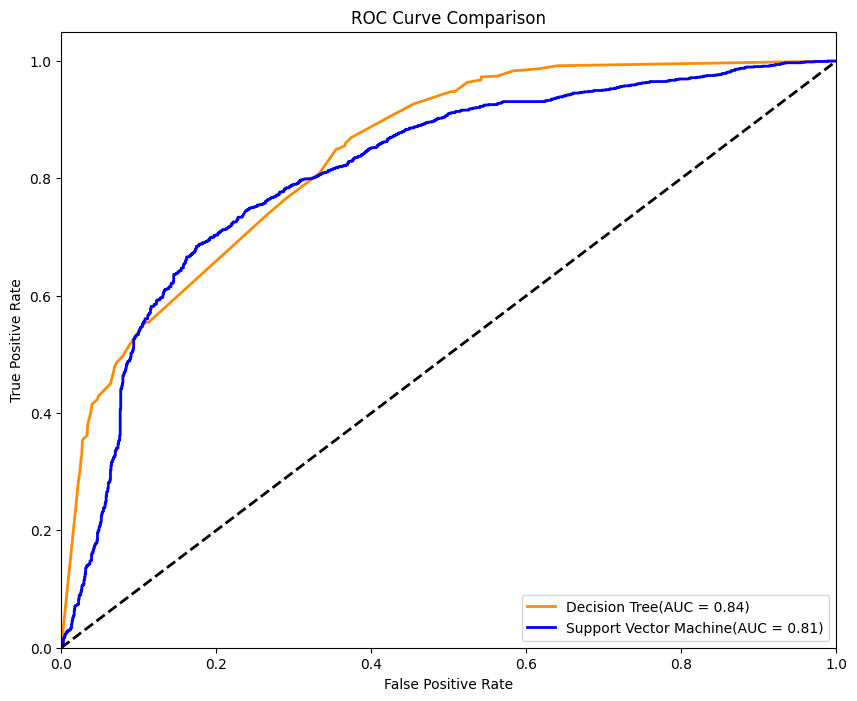

In [4]:
ML_algorithms.plot_roc_curve_conlusion(y_pred_prob_dt, y_test_dt, y_pred_prob_svm, y_test_svm)

### Classification report

In [5]:
print('Classification report - Decision Tree')
print(classification_report_dt)
print('Classification report - Support Vector Machine')
print(classification_report_svm)

Classification report - Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      1434
           1       0.70      0.85      0.77      1375

    accuracy                           0.75      2809
   macro avg       0.76      0.75      0.74      2809
weighted avg       0.76      0.75      0.74      2809

Classification report - Support Vector Machine
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1434
           1       0.75      0.74      0.74      1375

    accuracy                           0.75      2809
   macro avg       0.75      0.75      0.75      2809
weighted avg       0.75      0.75      0.75      2809

